# ПРОЕКТ 'ПРИНЯТИЕ РЕШЕНИЙ В БИЗНЕСЕ'

Побудем в роли аналитика крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 
Для анализа выберем следующие метрики:
- кумулятивную выручку по группам;
- кумулятивный средний чека по группам;
- относительное изменение кумулятивного среднего чека группы B к группе A;
- относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A;
- точечный график количества заказов по пользователям;
- точечный график стоимостей заказов;
- статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным;
- статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным;
- статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.


**Часть 1. Приоритизация гипотез.**

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import scipy.stats as stats

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.options.display.max_colwidth = 150
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
data.columns = data.columns.str.lower()

1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

**1. Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [6]:
data['ice'] = (data['impact'] * data['confidence']/data['efforts']).round(2)
data.sort_values(by='ice',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


**2. Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.**

In [7]:
data['rice'] = data['reach'] * data['impact'] * data['confidence']/data['efforts']
data.sort_values(by = 'rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.**

Для фреймворка ICE наиболее перспективные гипотезы:
- 8 (Запустить акцию, дающую скидку на товар в день рождения),
- 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей),
- 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок),
- 6 (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию)

Для фреймворка RICE гепотезы с индексом
- 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)б
- 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа), 
- 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей),
- 6 (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию)
являются наиболее перспективными.

Уровень охвата (Reach) повлиял на изменение приоритизации. Его измеряют количеством людей или событий за определенный период времени. Этот фактор предназначен для оценки того, на какое количество людей каждый определенный параметр повлияет в течение определенного количества времени, а также какое количество пользователей увидят такие изменения. 

**Часть 2. Анализ A/B-теста**

**2.1 Ознакомимся с датафреймами**

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**2.2 Предобработка данных**

In [13]:
# приведем столбец date к нужному формату в обоих датафреймах
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [14]:
# проверяем наличие дубликатов в orders
orders.duplicated().sum()

0

In [15]:
# проверяем наличие дубликтов в visitors
visitors.duplicated().sum()

0

In [16]:
# количество уникальные пользователей по группам в orders
orders.groupby('group').nunique('visitorId')['visitorId']

group
A    503
B    586
Name: visitorId, dtype: int64

In [17]:
# количество уникальные пользователей по группам в visitors
visitors.groupby('group').nunique('visitors')['visitors']

group
A    31
B    30
Name: visitors, dtype: int64

In [18]:
# количество задублированных пользователей в обеих группах в orders
orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1').count()

group    58
dtype: int64

In [19]:
double_orders = orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1').reset_index()
double_orders

,visitorId,group
0,8300375,2
1,199603092,2
2,232979603,2
3,237748145,2
4,276558944,2
5,351125977,2
6,393266494,2
7,457167155,2
8,471551937,2
9,477780734,2


In [20]:
# количество задублированных пользователей в обеих группах в visitors
visitors.groupby('visitors').agg({'group': 'nunique'}).query('group>1').count()

group    3
dtype: int64

In [21]:
double_visitors = visitors.groupby('visitors').agg({'group': 'nunique'}).query('group>1').reset_index()
double_visitors

,visitors,group
0,490,2
1,610,2
2,718,2


In [22]:
# удаляем дубликаты в orders
orders = orders[~orders['visitorId'].isin(double_orders['visitorId'])]

In [23]:
orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1').count()

group    0
dtype: int64

In [24]:
# удаляем дубликаты в visitors
#visitors = visitors[~visitors['visitors'].isin(double_visitors['visitors'])]
# Не понятно почему но если удалить дубликаты в visitors, то график 2.3.3 обрывается, уважаемый ревьюер проверьте пожалуйста(расскоментируйте строчку выше)

In [25]:
visitors.groupby('visitors').agg({'group': 'nunique'}).query('group>1').count()

group    3
dtype: int64

**В ходе предобработки данных было сделано следующее:**
- столбцы 'date' в обоих датафреймах были приведены к временному формату;
- были удалены дубликаты;
- пропущенных значений не обнаружено.

Данные готовы к работе

**2.3.1 Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.**

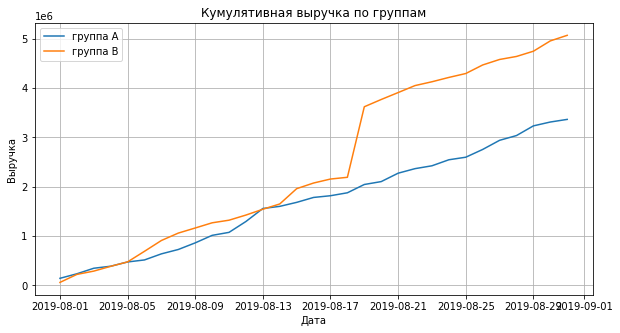

In [26]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()

**Вывод:** по графику видно, что у группы В накопление заметло лучше, чем у группы А. В начале второй половины теста у группы В произошел резкий рост, может быть в данных присутствуют аномалии.

**2.3.2 Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.**

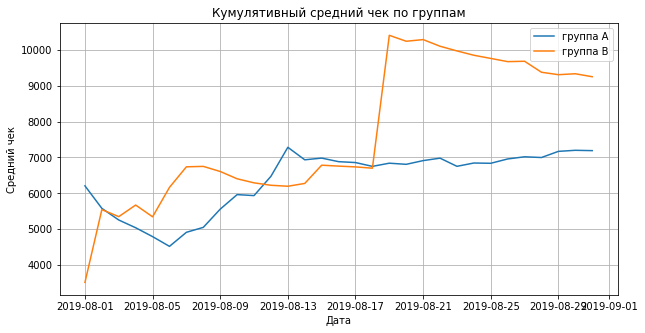

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend()

**Вывод:** Графики ведут себя по-разному - там где у группы А рост, у группы В падение. В середине теста у группы В набюдается резкий рост, в то время как ведет себя спокойно, без сильных колебаний. Необходим анализ выбросов.

**2.3.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.**

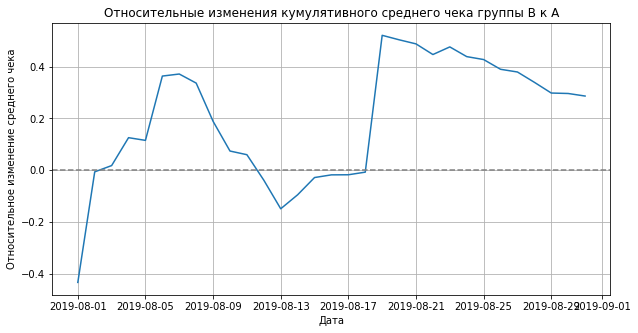

In [28]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 5))
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительные изменения кумулятивного среднего чека группы В к А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека')
plt.grid()
plt.axhline(y=0, color='grey', linestyle='--')

**Вывод:** По графику видно, что изменения происходили часто и сильно в определенные даты, скорее всего тогда и были сделаны аномальные заказы.

**2.3.4 Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.**

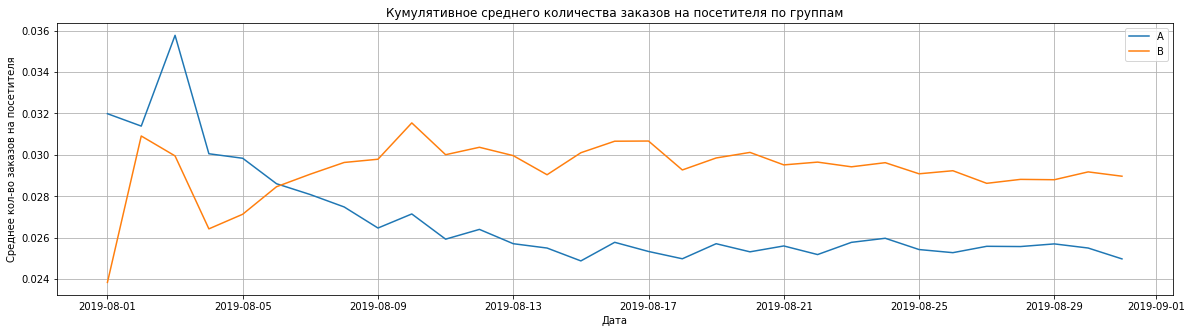

In [29]:
cumulativeData['order_visitor'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(20, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['orders']/cumulativeDataA['visitors'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['orders']/cumulativeDataB['visitors'], label='B')
plt.title('Кумулятивное среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя')
plt.grid()
plt.legend()

**Вывод:** на графике видно, что среднее количество заказов группы В больше чем у группы А. В начале теста наблюдается сильное волнение графиков, однако почти сразу стабилизируется.

**2.3.5 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.**

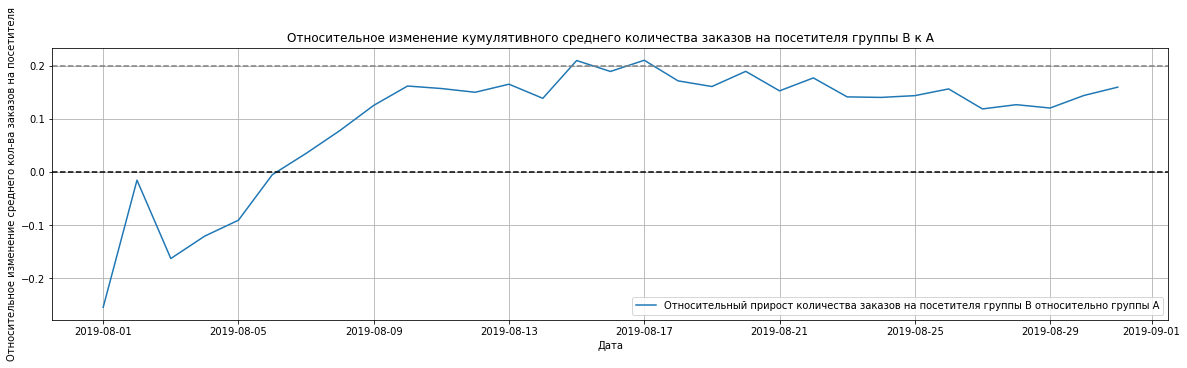

In [30]:
mergedCumulativeData = cumulativeDataA[['date','order_visitor']].merge(cumulativeDataB[['date','order_visitor']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20, 5))
plt.plot(mergedCumulativeData['date'], mergedCumulativeData['order_visitorB']/mergedCumulativeData['order_visitorA']-1, label="Относительный прирост количества заказов на посетителя группы B относительно группы A")
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего кол-ва заказов на посетителя')
plt.grid()
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

**Вывод:** По графику видно что почти сегда заказов у группы В больше чем у группы А, от 10 до 20 процентов.

**2.3.6 Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.**

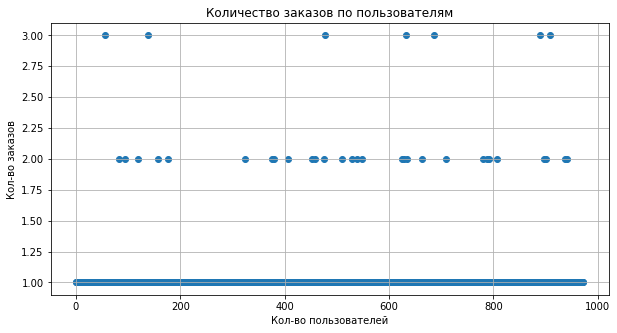

In [31]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']
plt.figure(figsize=(10, 5))
plt.grid()
plt.title('Количество заказов по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

**Вывод:** по графику видно, что основное количество заказов это 1, далее по рейтингу 2 с большим отставнием, 3- самое редкое.

**2.3.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [32]:
np.percentile(ordersByUsers['orders'],[90,95,99])

array([1., 1., 2.])

**Вывод:** не более 5% пользователей совершали 1 заказ, и 2 заказ не более 1%. Примем количество заказов равное 2 как границу для определения аномальных пользователей.

**2.3.8 Построим точечный график стоимостей заказов. Сделаем выводы и предположения.**

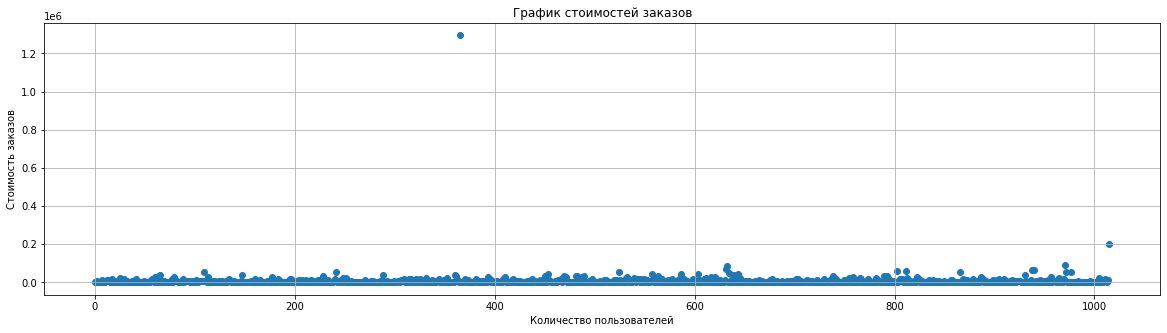

In [33]:
RevenueByUsers = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(20, 5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')

plt.scatter(RevenueByUsers, orders['revenue'])

**Вывод:** Стоимость почти всех заказов не превышает 180 000, есть выбросы на 200 000 и около 1.3 млн.

**2.3.9 Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

In [34]:
np.percentile(orders['revenue'],[90,95,99])

array([17990., 26785., 53904.])

**Вывод:** 99% заказов стоят меньше 53 904, это значение и будет грацией.

**2.3.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.**

Сформулируем гипотезы.

Нулевая: различий в среднем количестве заказов на посетителя между группами нет.

Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.

Используем критерий Манна-Уитни, так как в данных есть выбросы, а иные методы могут сильно повлиять на результат.

In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


print('Относительная разница между группами:',"{0:.3f}".format((sampleB.mean()/sampleA.mean()-1)))



P-value: 0.011
Относительная разница между группами: 0.160


**Вывод:** P-value меньше 0.05 - отвергаем нулевую гипотезу, различия в среднем количестве заказов на посетителя между группами есть.

**2.3.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.**

In [36]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительная разница между группами:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительная разница между группами: 0.287


**Вывод:** P-value больше 0.05 - статистически значимых отличий между группамми в среднем чеке нет, однако прирост среднего чека группы В к А равен 28,7%.

**2.3.12 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.**

In [37]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количество аномальных пользователей:' ,len(abnormalUsers)) 
print('Относительные потери:', round(len(abnormalUsers)/orders['visitorId'].nunique(),3))

Количество аномальных пользователей: 16
Относительные потери: 0.016


In [38]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница между группами:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.007
Относительная разница между группами: 0.189


**Вывод:** группа А уступает группе В.

**2.3.13 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.**

In [39]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница между группами:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.788
Относительная разница между группами: -0.032


**Вывод:** средний чек группы B оказался на 3,2% меньше среднего чека группы A, в то время как по "сырым" данным, он был больше почти в 10 раз. Скорее всего это связано с влиянием дорогих заказов.

**2.3.14 Результаты теста**

По результатам делаем вывод, что по среднему количеству заказов по "сырым" данным и по "очищенным" побеждает группа В. По среднему чеку различий найдено не было.

Было решено остановить тест и зафиксировать победу группы В по среднему количеству заказов.